In [51]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pylab

In [2]:
# set directory
os.chdir('/Users/shuaishuai/Google Drive/Research/NorthwesternUniversity/Greywater_Metagemonics/Greywater_Data/functions')
# define file names
gene_families = 'humann2_genefamilies-joined.tsv'
path_abundance = 'humann2_pathabundance-joined.tsv'
path_coverage = 'humann2_pathcoverage-joined.tsv'

sample_info = '../Sample_info.csv'

In [3]:
# read from txt files
gene_df = pd.read_csv(gene_families, delimiter = "\t",index_col=0)
sample_df = pd.read_csv(sample_info, index_col=0)

In [5]:
gene_df.head()

,house_1_raw_Abundance-RPKs,house_1_treat_Abundance-RPKs,house_2_raw_Abundance-RPKs,house_2_treat_Abundance-RPKs,house_3_raw_Abundance-RPKs,house_3_treat_Abundance-RPKs,house_4_raw_Abundance-RPKs,house_4_treat_Abundance-RPKs,house_5_raw_Abundance-RPKs,house_5_treat_Abundance-RPKs,house_1_raw_Abundance-RPKs.1,house_1_treat_Abundance-RPKs.1,house_2_raw_Abundance-RPKs.1,house_2_treat_Abundance-RPKs.1,house_3_raw_Abundance-RPKs.1,house_3_treat_Abundance-RPKs.1,house_4_raw_Abundance-RPKs.1,house_4_treat_Abundance-RPKs.1,house_5_raw_Abundance-RPKs.1,house_5_treat_Abundance-RPKs.1
# Gene Family,,,,,,,,,,,,,,,,,,,,
UNMAPPED,26011967.0,28930670.0,29551740.0,30975599.0,1.404194e+07,2.621985e+07,17486394.0,27501963.0,16089836.0,18156557.0,0.722488,0.867953,0.842204,0.733832,3.784010e-01,8.990270e-01,0.699157,0.876318,0.570781,0.864732
UniRef90_A0A009DWI3,0.0,0.0,0.0,0.0,2.278207e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.139300e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000
UniRef90_A0A009DWI3|unclassified,0.0,0.0,0.0,0.0,2.278207e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,6.139300e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000
UniRef90_A0A009DWL0,0.0,0.0,0.0,0.0,6.514527e-01,2.111830e-01,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.755530e-08,7.241050e-09,0.000000,0.000000,0.000000,0.000000
UniRef90_A0A009DWL0|unclassified,0.0,0.0,0.0,0.0,6.514527e-01,2.111830e-01,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.755530e-08,7.241050e-09,0.000000,0.000000,0.000000,0.000000


In [7]:
RPKs = [column for column in list(gene_df.columns) if column.endswith("-RPKs")]
gene_RPKs = gene_df[RPKs]

In [9]:
gene_RPKs.head()
print(gene_RPKs.shape)

(1644493, 10)


In [34]:
gene_RPKs.index = gene_RPKs.index.astype('str')
gene_RPKs_clean = gene_RPKs[~gene_RPKs.index.str.contains("\|")]
gene_RPKs_clean.head(5)

,house_1_raw_Abundance-RPKs,house_1_treat_Abundance-RPKs,house_2_raw_Abundance-RPKs,house_2_treat_Abundance-RPKs,house_3_raw_Abundance-RPKs,house_3_treat_Abundance-RPKs,house_4_raw_Abundance-RPKs,house_4_treat_Abundance-RPKs,house_5_raw_Abundance-RPKs,house_5_treat_Abundance-RPKs
# Gene Family,,,,,,,,,,
UNMAPPED,26011967.0,28930670.0,2.955174e+07,3.097560e+07,1.404194e+07,2.621985e+07,17486394.0,27501963.0,1.608984e+07,18156557.0
UniRef90_A0A009DWI3,0.0,0.0,0.000000e+00,0.000000e+00,2.278207e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0
UniRef90_A0A009DWL0,0.0,0.0,0.000000e+00,0.000000e+00,6.514527e-01,2.111830e-01,0.0,0.0,0.000000e+00,0.0
UniRef90_A0A009DWX0,0.0,0.0,0.000000e+00,3.873673e+01,1.794128e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0
UniRef90_A0A009DYQ2,0.0,0.0,3.459618e-01,2.897281e+00,0.000000e+00,0.000000e+00,0.0,0.0,6.722433e-01,0.0


In [46]:
total_reads = gene_RPKs_clean.sum()

### Search terms of gene families

For gene FabV search in UniPort: tab separated file

uniprot-fabv.tsv

In [37]:
fabV = "uniprot-fabv.tsv"
search_gene_info = pd.read_csv(fabV, delimiter = "\t", index_col = 0)
print(search_gene_info.shape)
search_gene_info.head()

(5439, 6)


,Entry name,Status,Protein names,Gene names,Organism,Length
Entry,,,,,,
Q9HZP8,FABV_PSEAE,reviewed,Enoyl-[acyl-carrier-protein] reductase [NADH] ...,fabV PA2950,Pseudomonas aeruginosa (strain ATCC 15692 / DS...,398
Q9KRA3,FABV1_VIBCH,reviewed,Enoyl-[acyl-carrier-protein] reductase [NADH] ...,fabV VC_1738/VC_1739,Vibrio cholerae serotype O1 (strain ATCC 39315...,401
Q2P9J6,FABV_XANOM,reviewed,Enoyl-[acyl-carrier-protein] reductase [NADH] ...,fabV XOO0026,Xanthomonas oryzae pv. oryzae (strain MAFF 311...,402
Q62L02,FABV_BURMA,reviewed,Enoyl-[acyl-carrier-protein] reductase [NADH] ...,fabV BMA0885,Burkholderia mallei (strain ATCC 23344),397
Q73Q47,FABV_TREDE,reviewed,Trans-2-enoyl-CoA reductase [NADH] (TER) (EC 1...,fabV TDE_0597,Treponema denticola (strain ATCC 35405 / DSM 1...,397


In [42]:
search_terms = tuple(search_gene_info.index)
fabV_RPKs = gene_RPKs_clean.loc[[gene for gene in list(gene_RPKs_clean.index) if gene.endswith(search_terms)],:]

In [48]:
print(fabV_RPKs.shape)
fabV_RPKM = fabV_RPKs/total_reads

(28, 10)


In [75]:
fabV_index = [gene[9:] for gene in list(fabV_RPKs.index)]
print(fabV_index)

['A3J0V9', 'A4SH85', 'A4SLJ1', 'A5FE91', 'A5W907', 'A6H0N4', 'B0KGW2', 'B2SUY7', 'B7V2Z1', 'C3K5J5', 'C4LB77', 'C5CWP4', 'E6UXE5', 'E6WW19', 'F6AHV2', 'F7QI69', 'G2Z1W7', 'G8X5K2', 'H7FRY3', 'H8XUN1', 'J1YEW0', 'J2SPI4', 'K8P2G3', 'M4WZ09', 'Q11W68', 'Q4KBE3', 'U1IL45', 'V6S195']


In [85]:
gene_names_df = search_gene_info.loc[[gene for gene in fabV_index],["Gene names"]]

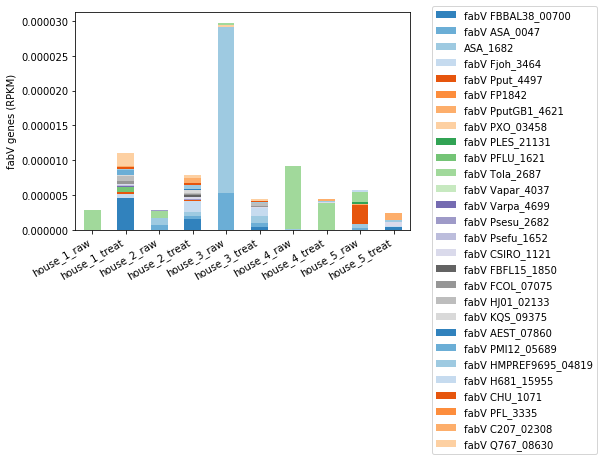

In [87]:
NUM_COLORS = 20
cm = pylab.get_cmap('tab20c')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))

samples = ["house_1_raw", "house_1_treat", 
          "house_2_raw", "house_2_treat",
          "house_3_raw", "house_3_treat",
          "house_4_raw", "house_4_treat",
          "house_5_raw", "house_5_treat"]

legends = list(gene_names_df["Gene names"])
    
ax = fabV_RPKM.transpose().plot.bar(stacked = True, color = colors)
ax.set_xticklabels(samples)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("fabV genes (RPKM)")
ax.legend(legends, bbox_to_anchor=(1.05, 1.05))
plt.savefig('figures/humann2_uniport_fabV.pdf',bbox_inches='tight')

In [6]:
sample_df

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
Sample,,,,,,,,,,
Site,House_1,House_1,House_2,House_2,House_3,House_3,House_4,House_4,House_5,House_5
Treatment,Raw,Treated,Raw,Treated,Raw,Treated,Raw,Treated,Raw,Treated


In [12]:
# append to sample information data
gene_meta_df = gene_df.set_axis(list(sample_df.columns), axis=1)
gene_meta_df = sample_df.append(gene_meta_df)
gene_meta_df.index.name = "Feature"
gene_meta_df.head()

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
Feature,,,,,,,,,,
Site,House_1,House_1,House_2,House_2,House_3,House_3,House_4,House_4,House_5,House_5
Treatment,Raw,Treated,Raw,Treated,Raw,Treated,Raw,Treated,Raw,Treated
UNMAPPED,0.722488,0.867953,0.842204,0.733832,0.378401,0.899027,0.699157,0.876318,0.570781,0.864732
UniRef90_A0A009DWI3,0,0,0,0,6.1393e-08,0,0,0,0,0
UniRef90_A0A009DWI3|unclassified,0,0,0,0,6.1393e-08,0,0,0,0,0


In [24]:
gene_meta_df.to_csv("gene_relab_meta.csv", sep = '\t')

In [19]:
top_20_gene_df = dc.sort_top_n(gene_df, 20)

KeyboardInterrupt: 

In [ ]:
ax1 = top_20_gene_df.transpose().plot.bar(stacked = True)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("relative abundance")
ax1.legend(bbox_to_anchor=(1.05, 1.05))
plt.savefig('figures/gene_top20.pdf',bbox_inches='tight')

Load path abundance (relative) + sample information

In [14]:
path_df = pd.read_csv(path_abundance, delimiter = "\t",index_col=0)
path_df = path_df.set_axis(list(sample_df.columns), axis=1)
path_df = sample_df.append(path_df)
path_df.index.name = "Feature"
path_df.head()

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
Feature,,,,,,,,,,
Site,House_1,House_1,House_2,House_2,House_3,House_3,House_4,House_4,House_5,House_5
Treatment,Raw,Treated,Raw,Treated,Raw,Treated,Raw,Treated,Raw,Treated
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis,0.000198642,7.62436e-05,0.000100316,0.000194629,0.000132299,5.56587e-05,0.000120984,9.64532e-05,0.00031238,9.25202e-05
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Acidovorax.s__Acidovorax_ebreus,0,0,0,0,4.01129e-07,0,0,0,0,0
1CMET2-PWY: N10-formyl-tetrahydrofolate biosynthesis|g__Acinetobacter.s__Acinetobacter_beijerinckii,0,2.01599e-05,0,3.38757e-07,0,2.06892e-06,0,0,0,0


In [15]:
path_df.shape

(4358, 10)

In [16]:
gene_df.shape

(1644493, 10)

In [21]:
top_20_path_df = dc.sort_top_n(path_df, 20)

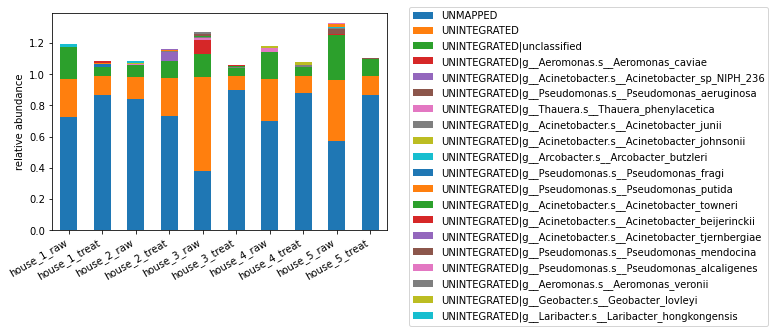

In [22]:
ax1 = top_20_path_df.transpose().plot.bar(stacked = True)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("relative abundance")
ax1.legend(bbox_to_anchor=(1.05, 1.05))
plt.savefig('figures/path_top20.pdf',bbox_inches='tight')